# ChE 212: Homework 1 Problem 3

# Problem Statement

Calculate the T-xy and y-x phase diagrams for the acetone benzene mixture at 1 atm. Assume the modified Raoult's law applies and use the Wilson equation to calculate activity coefficients.

You can find the Wilson equation parameters in Nagahama et al. 1971.

Vapor pressure as a function of temperature (T) can be estimated using the Antoine Equation.

Benzene's and Acetone's Antoine Equation parameters can be found in the NIST Chemical WebBook 

## Let's start by defining our equations

Antoine Equation: $$log_{10}(P) = A - \frac{B}{T+C}$$
Wilson Equation: $$W = \frac{A_{12}}{x_1 + (x_2\cdot A_{12})} - \frac{A_{21}}{(x_1\cdot A_{21}) + x_2} $$

Gammas:

$$\ln(\gamma_1) = -\ln(x_1+(x_2\cdot A_{12})) + x_2\cdot W$$

$$\ln(\gamma_2) = -\ln(x_2+(x_1\cdot A_{21})) - x_1\cdot W$$

y1 and y2:

$$y_1 = x_1\cdot \gamma_1 \cdot \frac{P_{sat1}}{P}$$
$$y_2 = x_2\cdot \gamma_2 \cdot \frac{P_{sat2}}{P}$$

We'll let acetone be system "1" and benzene be system "2"

## And now our known variables

In [1]:
P = 1 #bar NOTE: atm on problem! bar in solutions


##Antoine Coefficients
#Acetone
A_ace = 4.42448
B_ace = 1312.253
C_ace = -32.445
#Benzene
A_benz = 4.73
B_benz = 1660.652
C_benz = -1.461

## Nagahama et al. 1971 for mixtures
A12 = 0.4522 ## acetone in benzene
A21 = 1.2026 ## benzene in acetone

## Now let's make an x1 and x2 arrays. 
#### Remember, each respective entry of x1 and x2 have to sum to 1.

In [2]:
import numpy as np

x1 = np.linspace(0,1,21) ## this gives us steps of 0.05
x2 = 1 - x1 ## this gives us what x2 has to be based on the molar fraction of acetone present

## And our W array

In [3]:
W = (A12/(x1 + (x2*A12))) - (A21)/((x1*A21)+x2)

## Let's calculate our gammas

##### A quick note: in Python "log" is the natural log. np.ln() does not exist. To do log base 10, the code is np.log10()

In [9]:
ln_gamma1 = -np.log(x1+(x2*A12)) + (x2*W)
gamma1 = np.exp(ln_gamma1)

ln_gamma2 = -np.log(x2+(x1*A21)) - (x1*W)
gamma2 = np.exp(ln_gamma2)

## Now, let's define a function that will help us solve for temperature. We want to find the temperature that makes the y1 + y2 = 1, or that makes 1 - (y1 + y2) = 0.

In [11]:
def g(T,i): ## this is a function. we pass in a temperature (T) and an array index (i)
    Psat1 = 10**(A_ace - (B_ace/(T + C_ace))) ## saturated pressure using inputted T
    Psat2 = 10**(A_benz - (B_benz/(T + C_benz)))
    y1 = x1[i]*gamma1[i]*(Psat1/P) ## calculating vapor molar fraction of acetone
    y2 = x2[i]*gamma2[i]*(Psat2/P) ## calculating vapor molar fraction of benzene
    sumy = y1 + y2 ## to equal 1
    diff = abs(1 - sumy) ## is how we can easily find a minimum. we want this value to be as close to zero as possible!
    return diff

## We need to define an initial guess array. We don't know what the temperature might be, so we might make a guess that the temperature is between 300 and 360C. We choose 1000 increments between 300 and 360 to be evaluated
#### Note: 1000 increments is arbitrary. One can choose any positive integer!

In [12]:
Temp = np.linspace(300,360,1000)

## Let's solve for our temperatures!

In [16]:
T = [] ## define an empty array to store our iterative solution temperature values.

for i in range(0,len(x1)): ## iterating over all the values in x1
    min_diff = 1000 ## we define a variable min_diff that "resets" our difference comparison
    for j in range(0,len(Temp)): ## iterating over all temperatures in Temp
        diff_out = g(Temp[j],i) ## using the function above to calculate the difference of (1-(y1+y2)) at a given temperature (j) and x1, x2 (i)
        if diff_out < min_diff: ## if we reach a new minimum (less than the previous min_diff)
            min_diff = diff_out ## we establish whatever difference from the function output as the new min_diff
            True_temp = Temp[j] ## this pulls out the temperature at that minimum
    T.append(True_temp) ## this adds the minimum difference temperature to our empty array of iterative temperature values
    #print(f"Temperature: {True_temp},", f"Difference: {min_diff}") ## this prints the "True temperature" and minimum difference for each x1, x2 combo

## We have our liquid molar fractions and temperatures. We still need to calculate our y1 and y2 values with our "true" temperature

In [17]:
y1 = [] ## define empty arrays to store y1 and y2
y2 = []

for i in range(0,len(T)): ##iterating over the iterative solution temperature values. could also use x1 or x2 here since they are the same length
    Psat1 = 10**(A_ace - (B_ace/(T[i] + C_ace))) ## saturated pressure using inputted T
    Psat2 = 10**(A_benz - (B_benz/(T[i] + C_benz)))
    y1_calc = x1[i]*gamma1[i]*(Psat1/P) ## calculating vapor molar fraction of acetone
    y2_calc = x2[i]*gamma2[i]*(Psat2/P) ## calculating vapor molar fraction of benzene
    y1.append(y1_calc) ## adds the calculated y1 to the array
    y2.append(y2_calc)

## Now we can make a T-x-y plot!

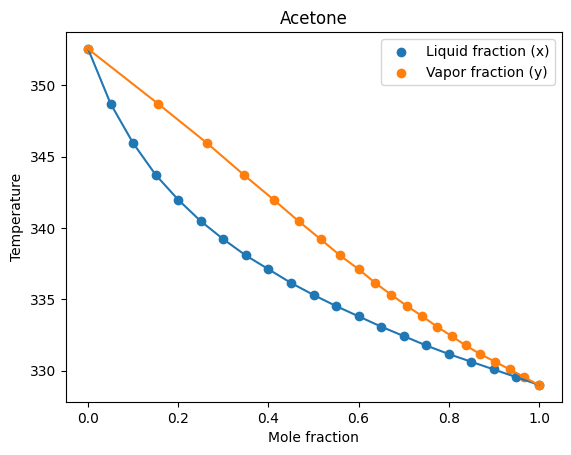

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x1,T) ## plotting x1 data points
plt.scatter(y1,T) ## plotting y1 data points
plt.plot(x1,T) ## plotting x1 line
plt.plot(y1,T) ## plotting y1 line
plt.xlabel('Mole fraction') ## adding x axis label
plt.ylabel('Temperature') ## adding y axis label
plt.legend(['Liquid fraction (x)', 'Vapor fraction (y)']) ## making a legend
plt.title('Acetone') ## adding a title
plt.show() ## makes output cleaner